In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,8)

In [4]:
df = pd.read_csv("./winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

## Wine Category
Let's create a new column 'category' which signifies the category of wine - High (1) or Low (0)

Wine with quality > 6 is considered to be High quality, rest are Low quality

In [8]:
#df.loc[df.b > 0, 'd'] = 1
df.loc[df.quality > 5, 'category'] = 1
df.loc[df.quality <= 5, 'category'] = 0

This is the frequency count for each category

In [9]:
df.category.value_counts()

1    855
0    744
Name: category, dtype: int64

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0


## Visual Exploration

Let's see how the columns are related

To start, lets take 2 variables at a time to explore data

#### Correlation
![](../img/corr.svg)

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62e5167e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62e01982d0>]], dtype=object)

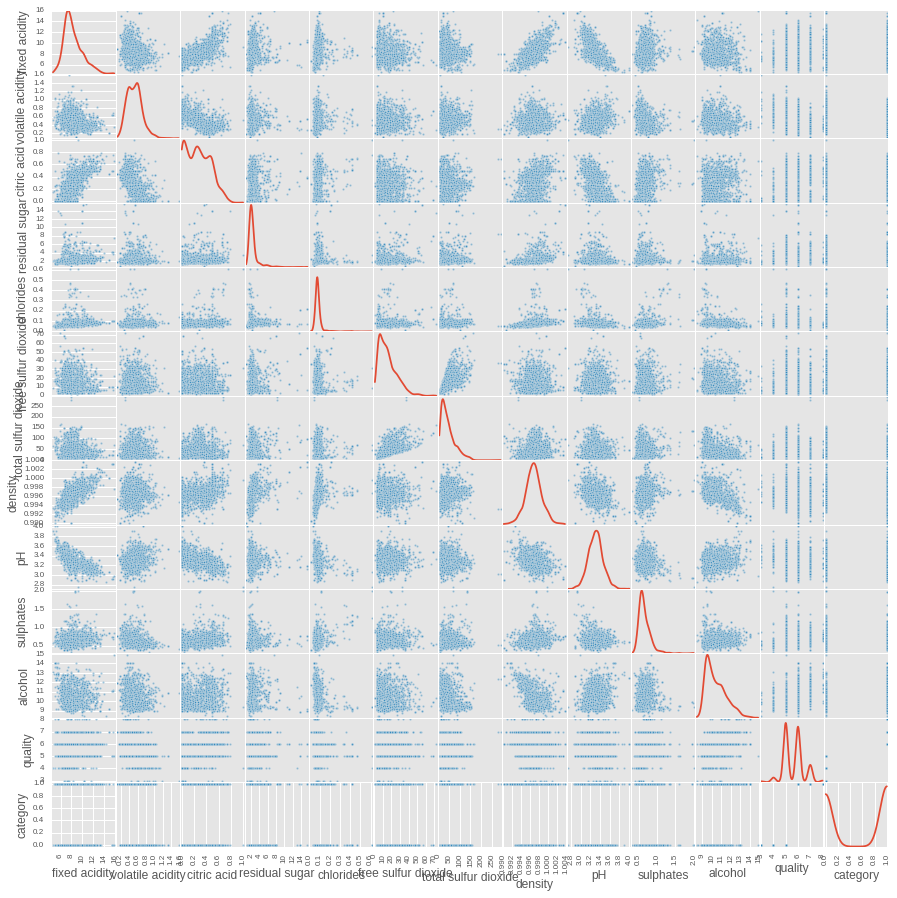

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15), diagonal='kde')

### Alcohol vs Category

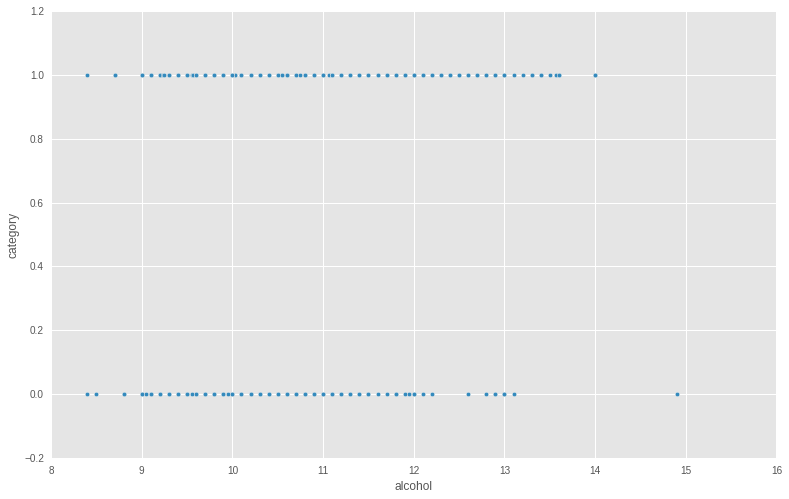

In [15]:
df.plot(x="alcohol", y="category", kind="scatter")

#### Exercise: Volatile Acidity vs Category

### 3 variable visualization
Let's add one more dimension to get more sense what is correlated

### Alcohol vs Volatile Acidity vs Category

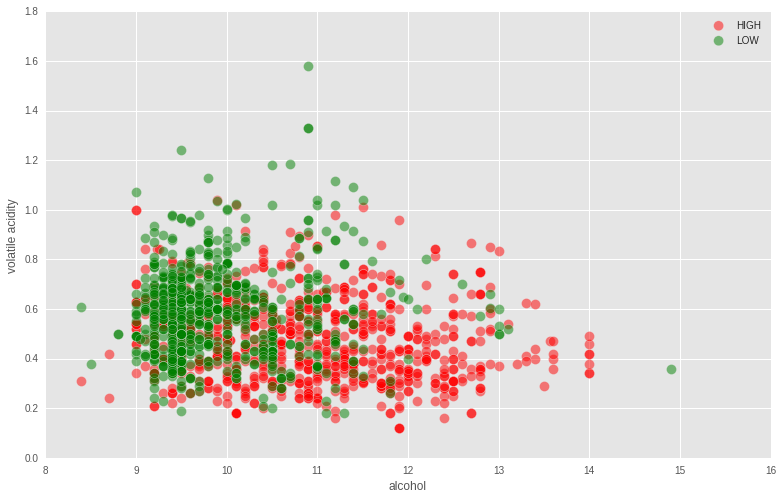

In [58]:
#df.plot(x="alcohol", y="volatile acidity", kind="scatter", c="category")
ax = df[df.category == 1].plot(x="alcohol", y="volatile acidity", kind="scatter", color="red", label="HIGH", s=100, alpha=0.5)
df[df.category == 0].plot(x="alcohol", y="volatile acidity", kind="scatter", color="green", label="LOW", s=100, alpha=0.5, ax=ax)

In [17]:
pd.set_option("precision",3)

### Time to build a predictive model

Let's build a model that can predict the category of wine, given information about alcohol content and volatile acidity

Building a predictive model involves training the model with historical data known as **training data**. Once we have the model trained, the model can predict labels (in this case, the category of wine) for the given features (test data)
We have 1600 rows of the wine data, lets split this data into 80:20 ratio as training:testingg data

**Why do we need to do this? **

We can compare the predicted label with the actual label.
By doing this, we can measure how accurate our model is.

In [33]:
df.shape

(1599, 13)

In [20]:
df_train = df.iloc[:1280,]
df_test = df.iloc[1280:,]

In [21]:
X_train = df_train["volatile acidity"]
y_train = df_train["category"]

In [22]:
X_test = df_test["volatile acidity"]
y_test = df_test["category"]

In [23]:
X_train = X_train.reshape(X_train.shape[0],1)

X_test = X_test.reshape(X_test.shape[0],1)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logistic_model = LogisticRegression()

In [26]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

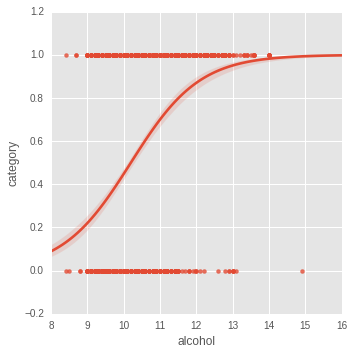

In [27]:
sns.lmplot(data=df, x="alcohol", y="category", logistic=True)

> It’s a bird… it’s a plane… it… depends on your classifier’s threshold
-- [Sancho McCann](https://sanchom.wordpress.com/2011/09/01/precision-recall/)

In [28]:
predicted = logistic_model.predict(X_test)

In [29]:
df_compare = pd.DataFrame()
df_compare["actual"] = y_test
df_compare["predicted"] = predicted
df_compare["volatile acidity"] = df_test["volatile acidity"]

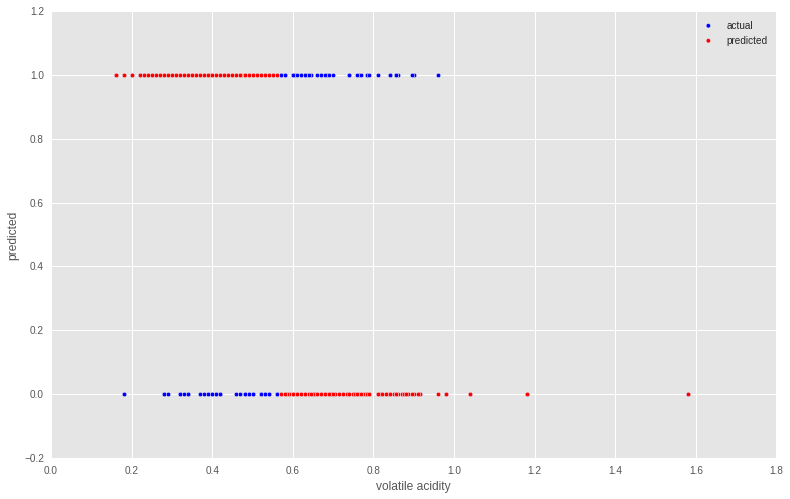

In [30]:
ax=df_compare.plot(x="volatile acidity", y="actual", kind="scatter", color="blue", label="actual")
df_compare.plot(x="volatile acidity", y="predicted", kind="scatter", color="red", label="predicted", ax=ax)

Let's add more features - volatile acidity, sulphates, alcohol to predict the category

2 variable model

In [34]:
df_train = df.iloc[:1280,]
df_test = df.iloc[1280:,]

In [39]:
X_train = df_train[["sulphates", "alcohol"]]
y_train = df_train["category"]

In [40]:
X_test = df_test[["sulphates", "alcohol"]]
y_test = df_test["category"]

In [41]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predicted = logistic_model.predict(X_test)

In [44]:
df_compare = pd.DataFrame()
df_compare["actual"] = y_test
df_compare["predicted"] = predicted
df_compare["sulphates"] = df_test["sulphates"]
df_compare["alcohol"] = df_test["alcohol"]

In [45]:
df_compare.head()

,actual,predicted,sulphates,alcohol
1280,1,1,0.64,10.4
1281,1,1,0.64,10.4
1282,1,1,0.68,10.9
1283,1,1,0.63,10.2
1284,0,1,0.56,10.9


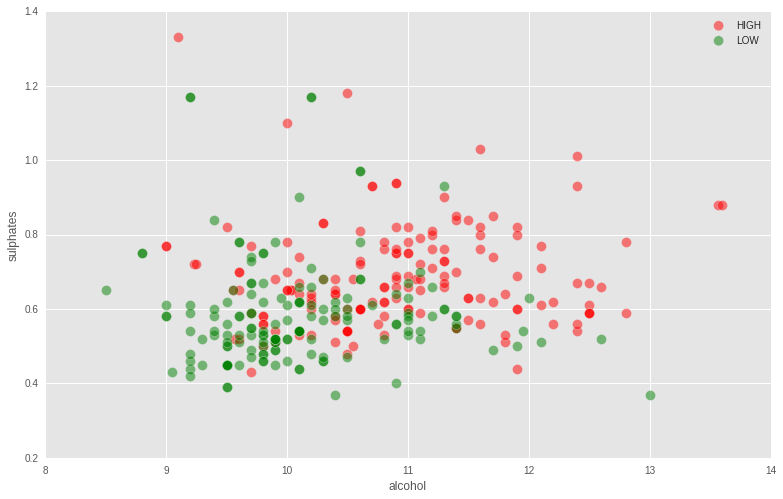

In [59]:
ax = df_compare[df_compare.actual == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="HIGH", s=100, alpha=0.5)
df_compare[df_compare.actual == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="LOW", s=100, alpha=0.5, ax=ax)

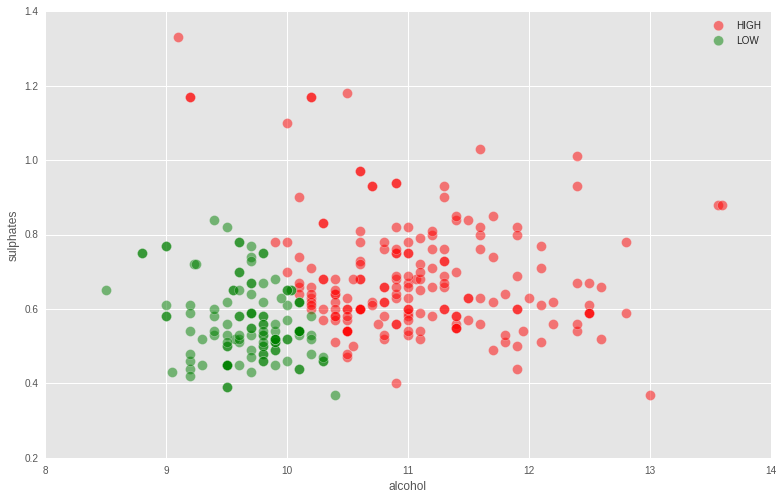

In [60]:
ax = df_compare[df_compare.predicted == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="HIGH", s=100, alpha=0.5)
df_compare[df_compare.predicted == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="LOW", s=100, alpha=0.5, ax=ax)

### Accuracy Metrics
* AUC
* ROC
* Misclassification Rate
* Confusion Matrix
* Precision & Recall

#### Confusion Matrix

![](../img/confusion-matrix.jpg)

#### Calculate True Positive Rate
    TPR = TP / (TP+FN)

#### Calculate False Positive Rate
    FPR = FP / (FP+TN)

#### Precise & Recall

### AUC-ROC for the model

In [62]:
from sklearn import metrics

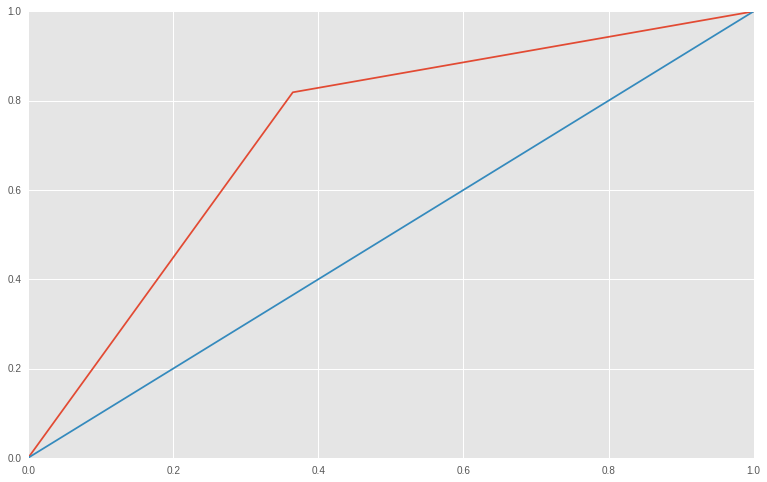

In [64]:
#ols_auc = metrics.roc_auc_score(df_compare.actual, df_compare.predicted)
fpr, tpr, thresholds = metrics.roc_curve(df_compare.actual, df_compare.predicted)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])